In [101]:
import pandas as pd
import time
import numpy as np
import os 
from scipy.interpolate import spline
import matplotlib.pyplot as plt
plt.rcParams['text.usetex']=True
plt.rcParams['text.latex.unicode']=True
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [102]:
# Local variables

# Open the data file for reading lines
def plot(data = 'data.csv', norm_x = True):
    datafile = pd.read_csv(data)
    x = datafile['Step']
    y = datafile['Value']
    name =  i.split("-")[2].split('.')[0]
    x_label = 'frames'
    if norm_x: 
        x/=256
        x_label = 'Episodes'

    x_sm = np.array(x)
    y_sm = np.array(y)

    x_smooth = np.linspace(0, x_sm.max(), 100)
    y_smooth = spline(x, y, x_smooth)
    return x_smooth, y_smooth, name


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


<Figure size 1440x720 with 0 Axes>

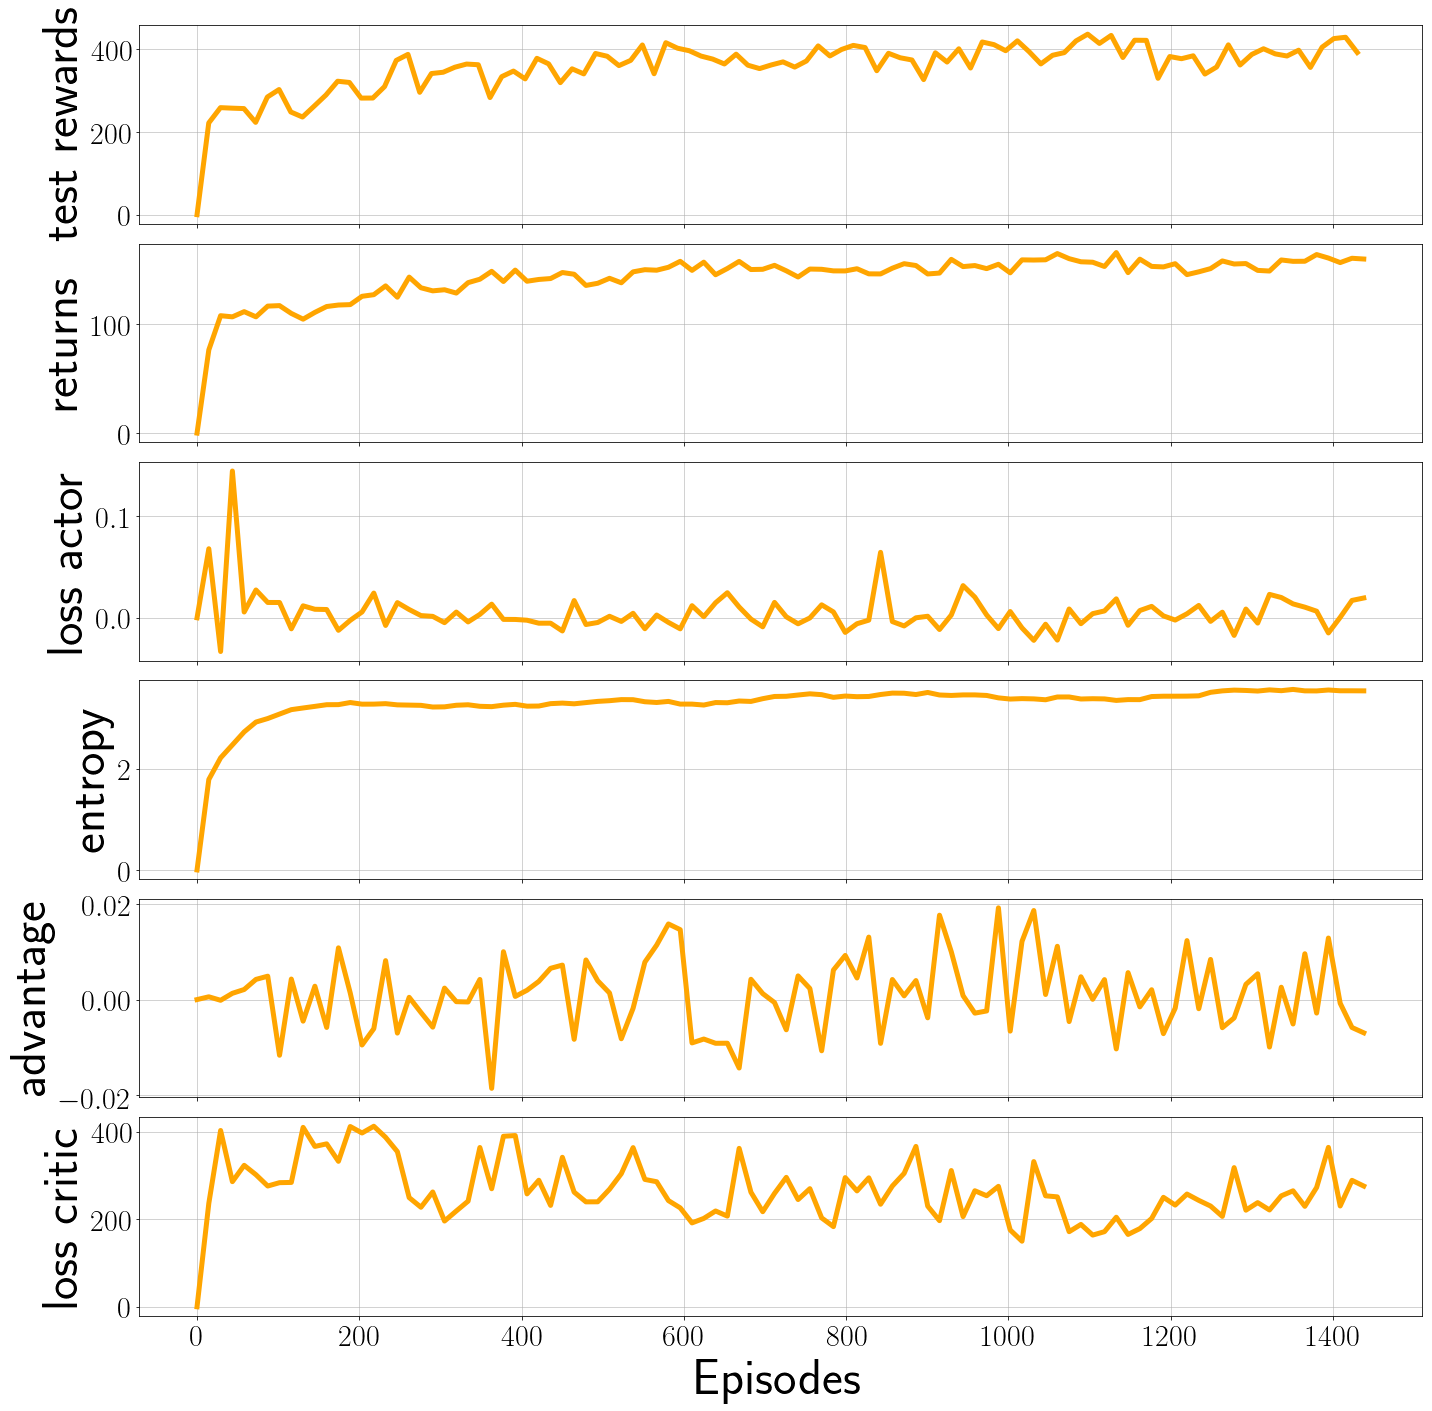

In [119]:
c=0

canvas = plt.figure(figsize=(20,10))
fig, axs = plt.subplots(nrows=6, ncols=1, sharex=True, figsize=(20,20))

for i in os.listdir():
    if i.endswith('.csv'):
        c+=1
        
        x_smooth, y_smooth, name = plot(data = i, norm_x = True)
        color = 'orange'
        axs[c-1].plot(x_smooth, y_smooth, color, linewidth=5)
        color = 'k'
        # Colorcode the tick tabs 
        axs[c-1].tick_params(axis='x', colors=color, labelsize=30)
        axs[c-1].tick_params(axis='y', colors=color, labelsize=30)
        color = 'k'
        # Colorcode the spine of the graph
        axs[c-1].spines['bottom'].set_color(color)
        axs[c-1].spines['top'].set_color(color)
        axs[c-1].spines['left'].set_color(color)
        axs[c-1].spines['right'].set_color(color)
        # Put the title and labels
        #plt.title(datafile.shape, color=color)
        plt.xlabel(x_label, color=color, size=50)
        name = " ".join(name.split('_'))
        axs[c-1].set_ylabel(str(name), color=color, size=50)
        axs[c-1].grid(alpha=0.7)
# #         # Show the plot/image
#         #sp1.tight_layout()
# #         plt.grid(alpha=0.8)
# #         plt.savefig("../img/"+name+".png")
# #         plt.show()
# #         #plt.show()
plt.tight_layout()
plt.subplots_adjust(wspace=1, hspace=0.1)
plt.savefig("../img/results.png")

q = plot(data = i, norm_x = True)


In [73]:
int(str(c)+ str(6) + str(1))

61